In [1]:
import pandas as pd
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

import datetime
import pywt

import glob
import os

In [2]:
def concat_data(path, usecolums=None):
    allFiles = glob.glob(path + "/*.csv")
    frame = pd.DataFrame()
    list_ = []
    for file_ in allFiles:
        df = pd.read_csv(file_,header=0, usecols=usecolums)
        dirname,filename = os.path.split(file_)
        df.columns = [filename[0:10]]
        list_.append(df)
        frame = pd.concat(list_, axis=1)
    return frame

In [3]:
path = "C:\Users\hp\Desktop\ME 592X\Assignment 3\house_02_sm_JAN"

# Smart Meter Dataframe
sm_df = concat_data(path,usecolums=[0])  


In [4]:
sm_df.head(5)

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2013-01-22,2013-01-23,2013-01-24,2013-01-25,2013-01-26,2013-01-27,2013-01-28,2013-01-29,2013-01-30,2013-01-31
0,37.544,120.440,109.811,106.245,402.795,37.478,37.573,41.460,91.396,107.039,...,89.952,117.570,92.064,112.409,503.561,37.770,113.491,107.811,90.454,91.360
1,37.195,119.115,109.756,106.174,403.232,37.505,37.474,41.252,90.727,107.007,...,90.224,117.944,92.576,112.922,503.495,37.587,113.486,106.677,90.054,91.087
2,37.491,116.959,109.611,106.515,404.003,37.598,37.187,41.397,90.804,106.759,...,89.820,117.592,92.380,112.134,506.624,37.714,113.217,106.182,90.488,90.826
3,37.911,115.366,109.514,106.261,402.990,37.300,37.401,41.003,91.428,106.786,...,89.451,116.246,92.394,112.287,503.506,37.237,113.111,105.383,90.444,91.136
4,37.385,115.348,109.614,106.213,402.466,37.319,37.309,41.165,90.518,107.114,...,89.938,115.583,92.190,112.253,503.480,37.372,112.991,105.116,90.462,91.145


In [5]:
cols = list(sm_df.columns)

date = []

for col in cols:
     for sec in range(0, 86400):
        date.append(col + " " + str(datetime.timedelta(seconds=sec))) # Append formatted Timestamp
        
df1 = pd.DataFrame(data=date)  # Creating a 1-D dataframe with the timestamp


In [6]:
reshape_sm_df = sm_df.values.reshape(2678369,1)
df2 = pd.DataFrame(reshape_sm_df)

In [7]:
# Merging the two 1-D dataframe
frames = [df1, df2]
sm_vec = pd.concat(frames, axis=1)
sm_vec.columns=['Timestamp', 'Power']

sm_vec.head()

,Timestamp,Power
0,2013-01-01 0:00:00,37.544
1,2013-01-01 0:00:01,120.440
2,2013-01-01 0:00:02,109.811
3,2013-01-01 0:00:03,106.245
4,2013-01-01 0:00:04,402.795


In [8]:
path = "C:\Users\hp\Desktop\ME 592X\Assignment 3\Fridge_JAN"

fridge_df = concat_data(path, usecolums=[0])

In [9]:
fridge_df.head(5)

,2012-06-01,2012-06-02,2012-06-03,2012-06-04,2012-06-05,2012-06-06,2012-06-07,2012-06-08,2012-06-09,2012-06-10,...,2013-01-22,2013-01-23,2013-01-24,2013-01-25,2013-01-26,2013-01-27,2013-01-28,2013-01-29,2013-01-30,2013-01-31
0,4.32930,0.0,2.21504,0.00000,0.0,0.00000,0.00000,2.21504,2.21504,2.21504,...,0.00000,2.21504,0.00000,0.00000,0.00000,0.0,0.00000,2.21504,2.21504,2.21504
1,2.21504,0.0,0.00000,2.21504,0.0,0.00000,2.21504,0.00000,2.21504,2.21504,...,2.21504,0.00000,2.21504,2.21504,2.21504,0.0,2.21504,0.00000,2.21504,2.21504
2,2.21504,0.0,2.21504,0.00000,0.0,0.00000,2.21504,0.00000,2.21504,2.21504,...,0.00000,2.21504,2.21504,0.00000,0.00000,0.0,0.00000,2.21504,0.00000,4.32930
3,2.21504,0.0,0.00000,0.00000,0.0,2.21504,0.00000,0.00000,2.21504,2.21504,...,2.21504,0.00000,2.21504,2.21504,2.21504,0.0,2.21504,2.21504,0.00000,2.21504
4,2.21504,0.0,2.21504,0.00000,0.0,0.00000,0.00000,2.21504,2.21504,2.21504,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,2.21504,2.21504


In [10]:
new_fridge_df = fridge_df[fridge_df.columns[209:]]

In [11]:
new_fridge_df.head()

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2013-01-22,2013-01-23,2013-01-24,2013-01-25,2013-01-26,2013-01-27,2013-01-28,2013-01-29,2013-01-30,2013-01-31
0,2.21504,2.21504,2.21504,2.21504,2.21504,2.21504,0.00000,0.00000,0.00000,0.00000,...,0.00000,2.21504,0.00000,0.00000,0.00000,0.0,0.00000,2.21504,2.21504,2.21504
1,2.21504,0.00000,0.00000,0.00000,2.21504,0.00000,0.00000,2.21504,2.21504,2.21504,...,2.21504,0.00000,2.21504,2.21504,2.21504,0.0,2.21504,0.00000,2.21504,2.21504
2,2.21504,2.21504,2.21504,2.21504,0.00000,2.21504,2.21504,0.00000,0.00000,0.00000,...,0.00000,2.21504,2.21504,0.00000,0.00000,0.0,0.00000,2.21504,0.00000,4.32930
3,0.00000,0.00000,0.00000,0.00000,2.21504,0.00000,2.21504,2.21504,2.21504,2.21504,...,2.21504,0.00000,2.21504,2.21504,2.21504,0.0,2.21504,2.21504,0.00000,2.21504
4,0.00000,2.21504,2.21504,2.21504,0.00000,2.21504,2.21504,2.21504,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,2.21504,2.21504


In [12]:
reshape_fridge_df = new_fridge_df.values.reshape(2678369,1)
df2 = pd.DataFrame(reshape_fridge_df)

In [13]:
frames = [df1, df2]
fridge_vec = pd.concat(frames, axis=1)
fridge_vec.columns=['Timestamp', 'Power']

fridge_vec.head(5)

,Timestamp,Power
0,2013-01-01 0:00:00,2.21504
1,2013-01-01 0:00:01,2.21504
2,2013-01-01 0:00:02,2.21504
3,2013-01-01 0:00:03,2.21504
4,2013-01-01 0:00:04,2.21504


In [14]:
sm_vec.plot()

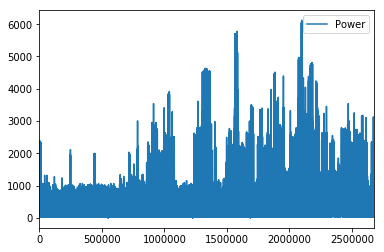

In [15]:
plt.show()

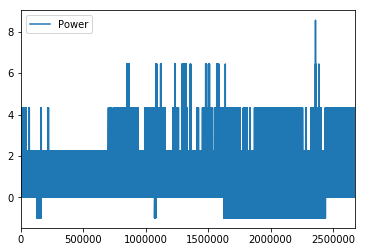

In [16]:
fridge_vec.plot()
plt.show()

In [17]:
sm_vec['Power'] = (sm_vec['Power']-sm_vec['Power'].mean())/(sm_vec['Power'].max()-sm_vec['Power'].min())

In [18]:
sm_vec['Power'].head()

0   -0.028998
1   -0.015458
2   -0.017194
3   -0.017777
4    0.030660
Name: Power, dtype: float64

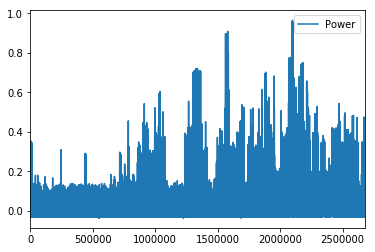

In [19]:
sm_vec.plot()
plt.show()

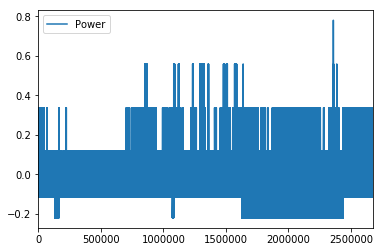

In [20]:
fridge_vec['Power'] = (fridge_vec['Power']-fridge_vec['Power'].mean())/(fridge_vec['Power'].max()-fridge_vec['Power'].min())
fridge_vec.plot()
plt.show()

In [21]:
cA_sm, cD_sm = pywt.dwt(sm_vec['Power'],'db1')

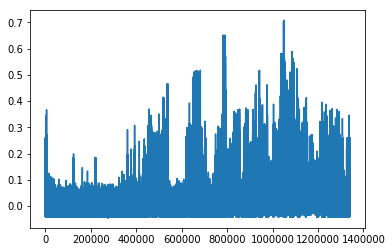

In [22]:
plt.plot(cA_sm)
plt.show()

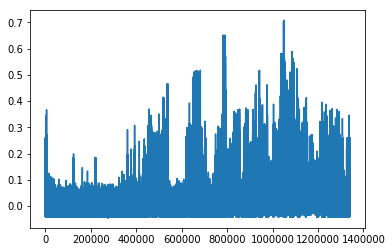

In [23]:
cA_fr, cD_fr = pywt.dwt(fridge_vec['Power'],'db1')
plt.plot(cA_sm)
plt.show()

# Train and Test sets

In [24]:
from sklearn.model_selection import train_test_split

train_sm, test_sm = train_test_split(sm_vec, test_size=0.2)
train_fr, test_fr = train_test_split(fridge_vec, test_size=0.2)

In [24]:
train_fr.head()

,Timestamp,Power
822581,2013-01-10 12:29:41,-0.115776
1892947,2013-01-22 21:49:07,-0.115776
1372032,2013-01-16 21:07:12,0.115976
1521113,2013-01-18 14:31:53,0.115976
1116008,2013-01-13 22:00:08,0.115976


# Design and Train HMM

In [25]:
from nltk.corpus import treebank
from nltk.tag import hmm

In [30]:
variability_indicators = [fridge_vec['Power'].std()]

In [26]:
import numpy as np
from hmmlearn import hmm

In [27]:
np.random.seed(5)
model = hmm.GaussianHMM(n_components=2, )